In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/lib/cuda'
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import tensorflow as tf
from tensorflow import keras

print("GPU available:", len(tf.config.list_physical_devices('GPU')))

2023-05-15 22:51:27.080134: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


GPU available: 1


In [3]:
from data_preprocessing import DataProcessor
from model import MLPAutoencoder, WeightedMSE, OCCModel

In [4]:
PROJECT_PATH = '/raid/shumnov/music-style-performer/'

In [5]:
architecture = [((64, 32), (0, 0), (32, 64), (0, 0)), 
                ((64, 32, 32), (0, 0, 0), (32, 32, 64), (0, 0, 0))]
weights = [(1, 1), (2, 5)]
latent_dim = [16, 32]
absolute_velocities = [True, False]

In [6]:
def test(av, ld, w, arch, name):
    dp = DataProcessor(
        notes_qty=16, 
        include_first_tone=False, 
        absolute_velocities=av)

    dp.load_dset(PROJECT_PATH + 'data/dset20.npy', PROJECT_PATH + 'data/test_dset20.npy')
    
    autoencoder = MLPAutoencoder(
        input_size=dp.input_size,
        latent_dim=ld,
        noise=0.02,
        encoder_layers=arch[0],
        encoder_dropout=arch[1],
        decoder_layers=arch[2],
        decoder_dropout=arch[3])
    
    loss = WeightedMSE(
        vel_mask=dp.vel_mask, 
        leg_mask=dp.leg_mask, 
        first_last_mask=dp.first_last_mask, 
        vel_weight=w[0], 
        leg_weight=w[1], 
        first_last_weight=1)
    
    model = OCCModel(
        modelsdir=PROJECT_PATH+'traindata',
        name=name, 
        autoencoder=autoencoder,
        dataprocessor=dp,
        optimizer=keras.optimizers.Adam(3e-4),
        loss=loss,
        ckpt_epochs=1)
    
    model.fit(7)

Epoch 1/7
OCC accuracy: 0.7495780289173126
196441/196441 - 516s - loss: 0.0680 - val_loss: 0.1022 - 516s/epoch - 3ms/step
Epoch 2/7
OCC accuracy: 0.738083254545927
196441/196441 - 517s - loss: 0.0622 - val_loss: 0.1005 - 517s/epoch - 3ms/step
Epoch 3/7
OCC accuracy: 0.7288617454469204
196441/196441 - 521s - loss: 0.0613 - val_loss: 0.1001 - 521s/epoch - 3ms/step
Epoch 4/7
OCC accuracy: 0.7191215716302395
196441/196441 - 522s - loss: 0.0610 - val_loss: 0.0992 - 522s/epoch - 3ms/step
Epoch 5/7
OCC accuracy: 0.7107380349189043
196441/196441 - 517s - loss: 0.0598 - val_loss: 0.0986 - 517s/epoch - 3ms/step
Epoch 6/7
OCC accuracy: 0.7163510341197252
196441/196441 - 515s - loss: 0.0595 - val_loss: 0.0984 - 515s/epoch - 3ms/step
Epoch 7/7
OCC accuracy: 0.7110312320291996
196441/196441 - 517s - loss: 0.0594 - val_loss: 0.0981 - 517s/epoch - 3ms/step
Epoch 1/7
OCC accuracy: 0.7216660529375076
196441/196441 - 519s - loss: 0.0744 - val_loss: 0.0840 - 519s/epoch - 3ms/step
Epoch 2/7
OCC accuracy: 0

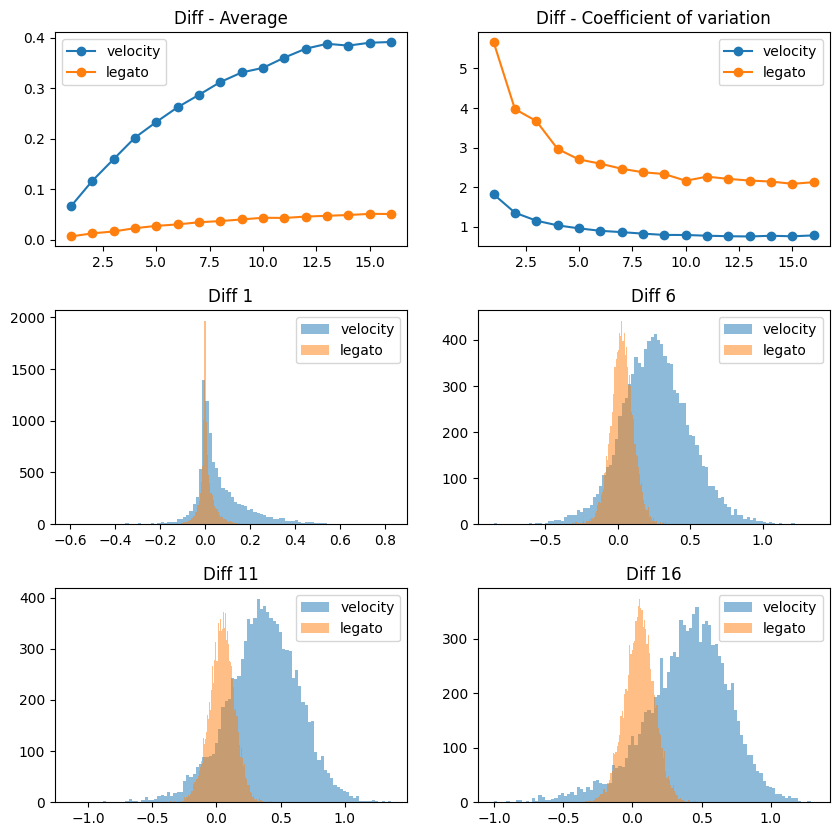

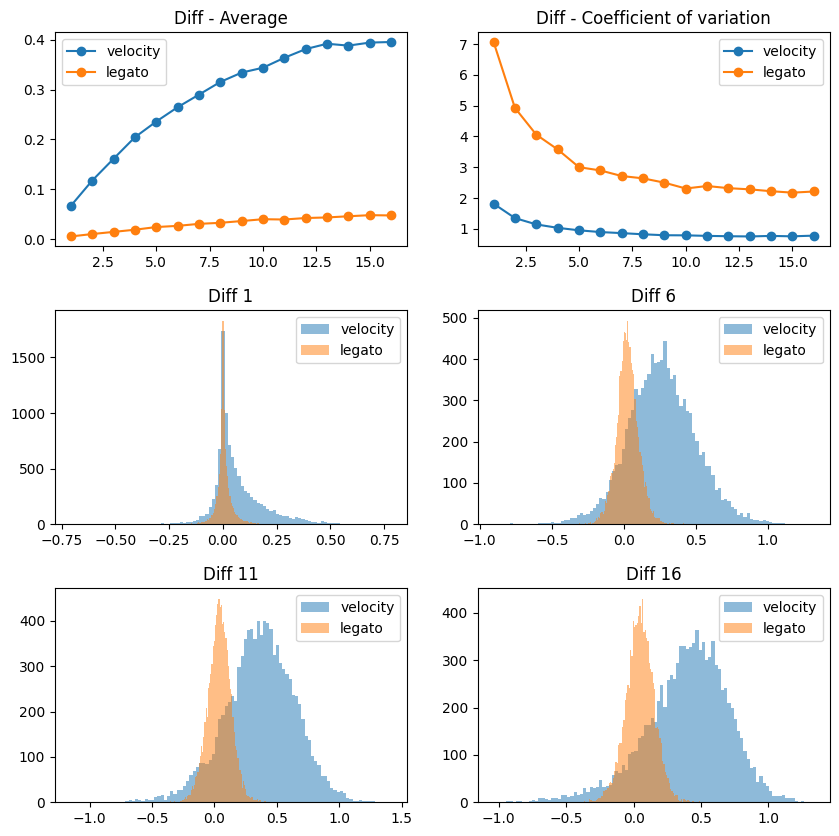

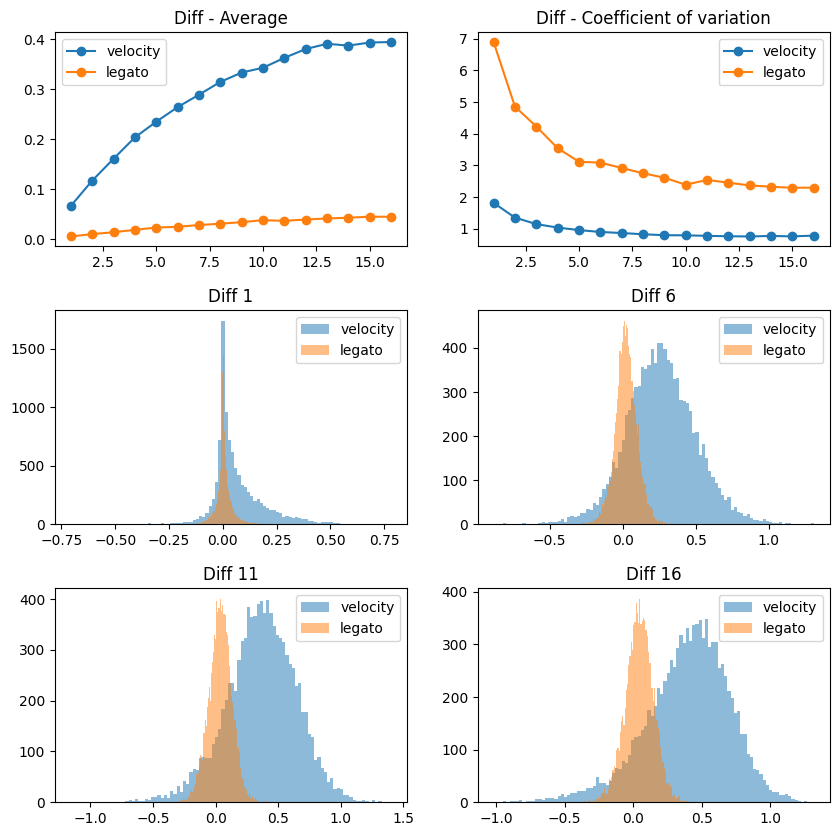

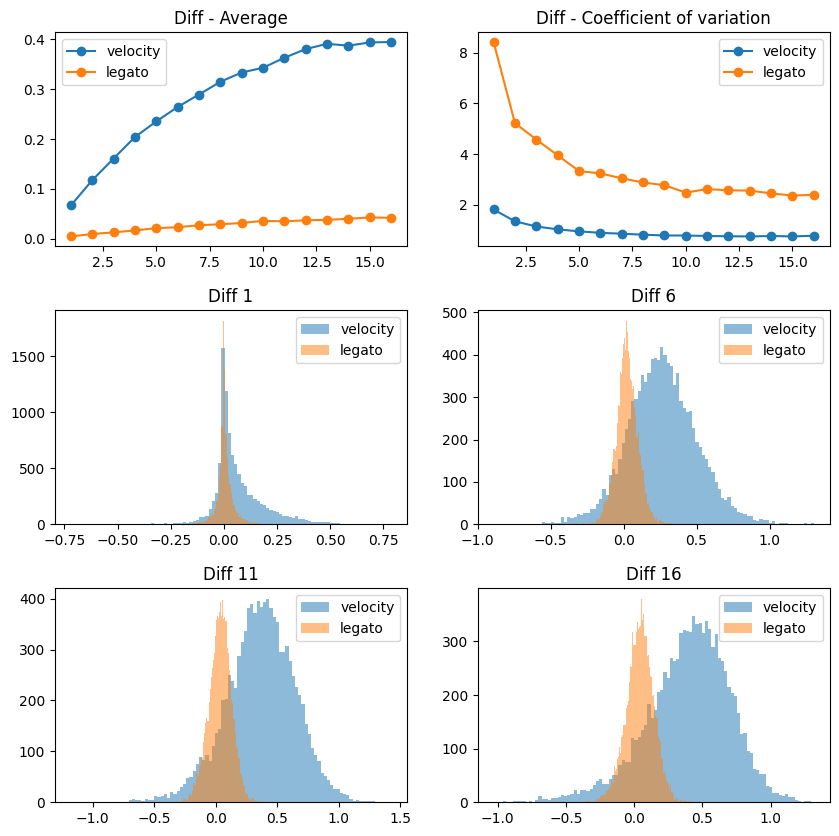

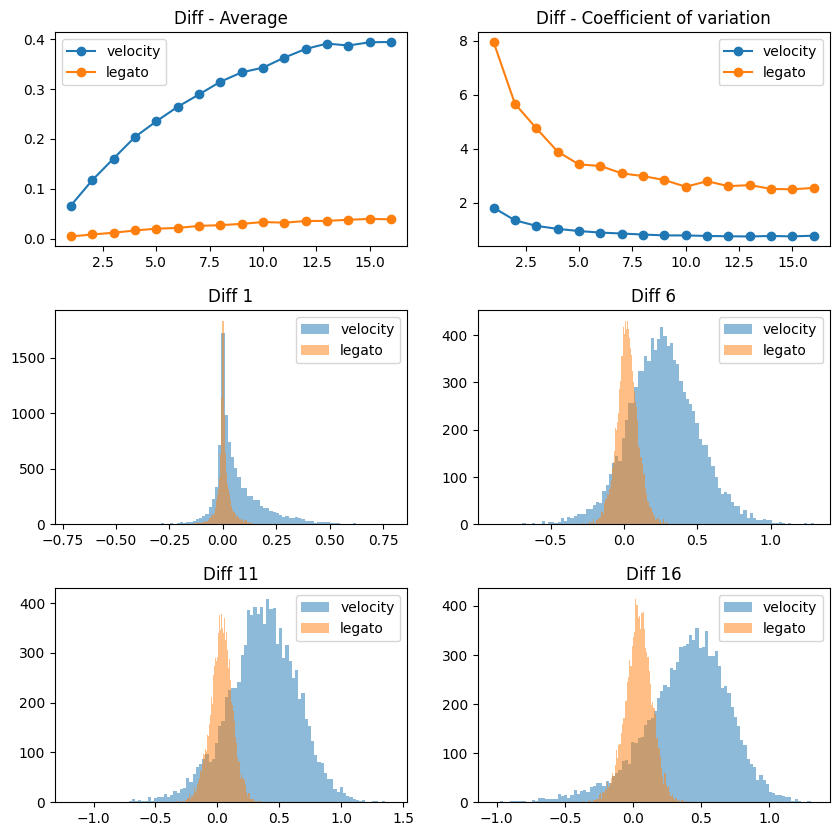

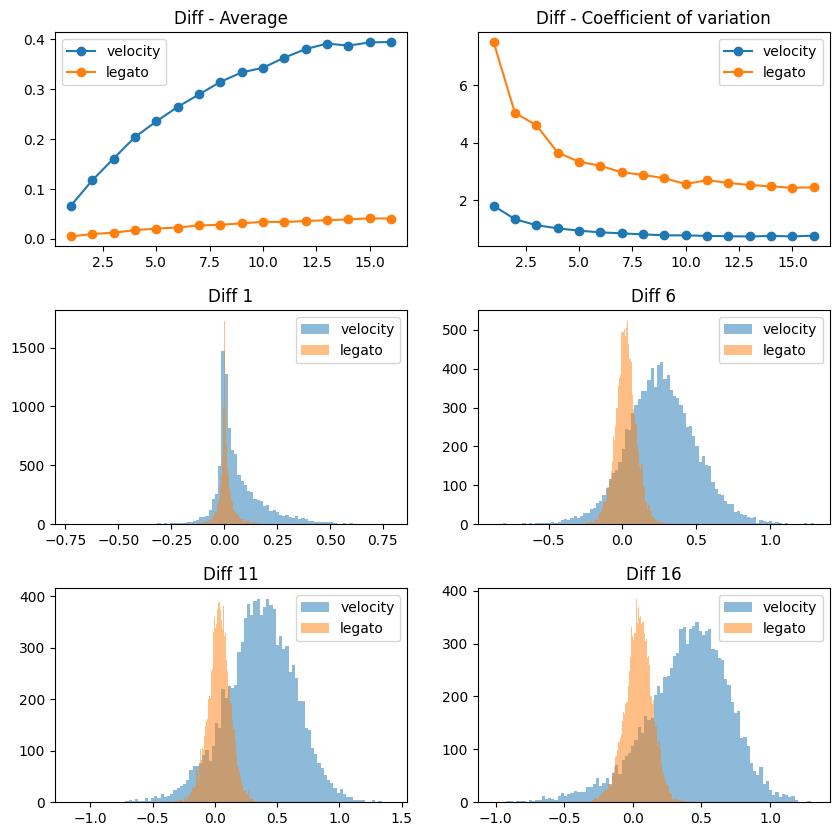

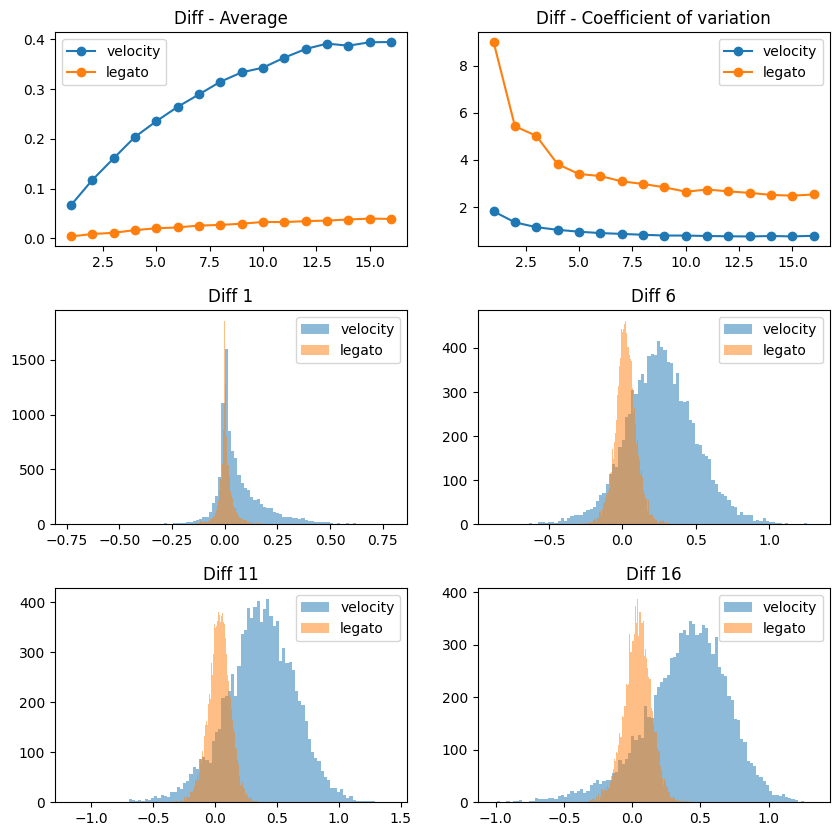

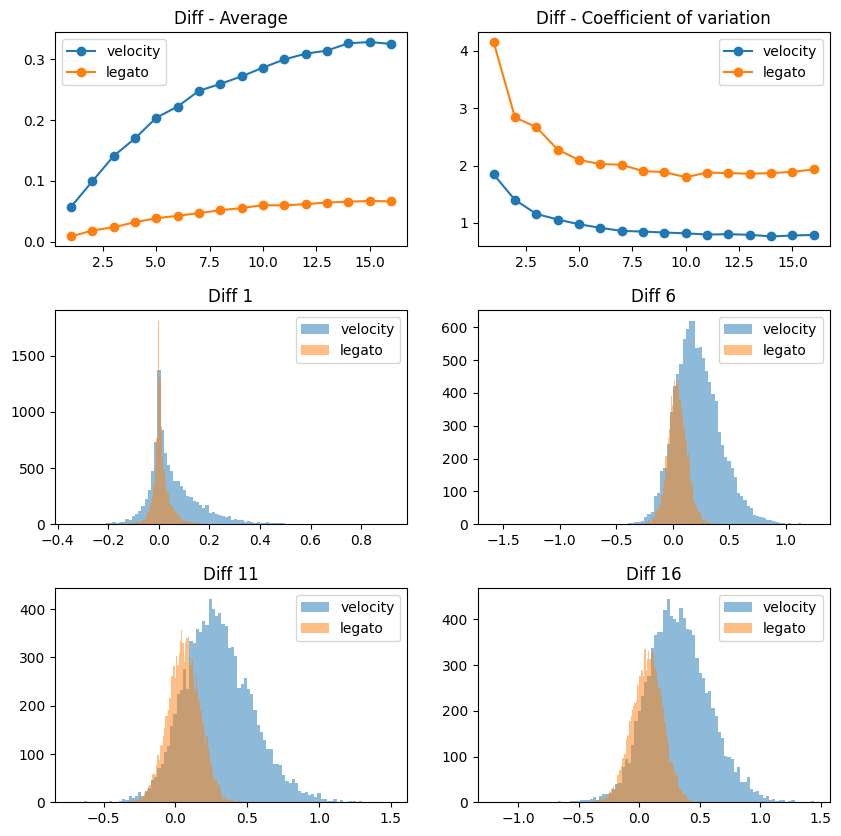

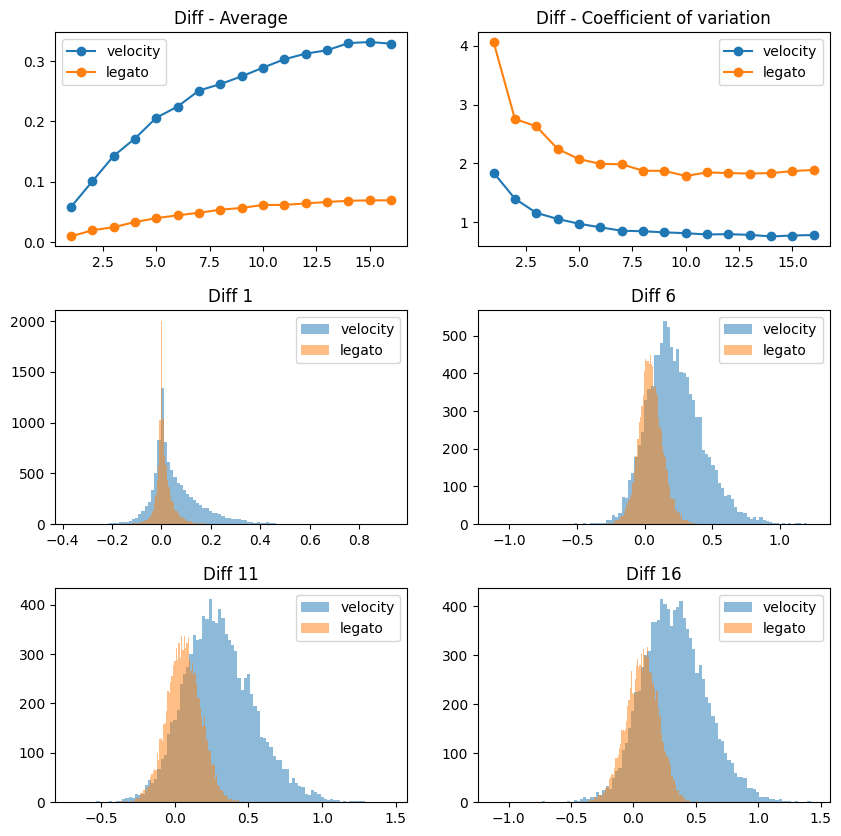

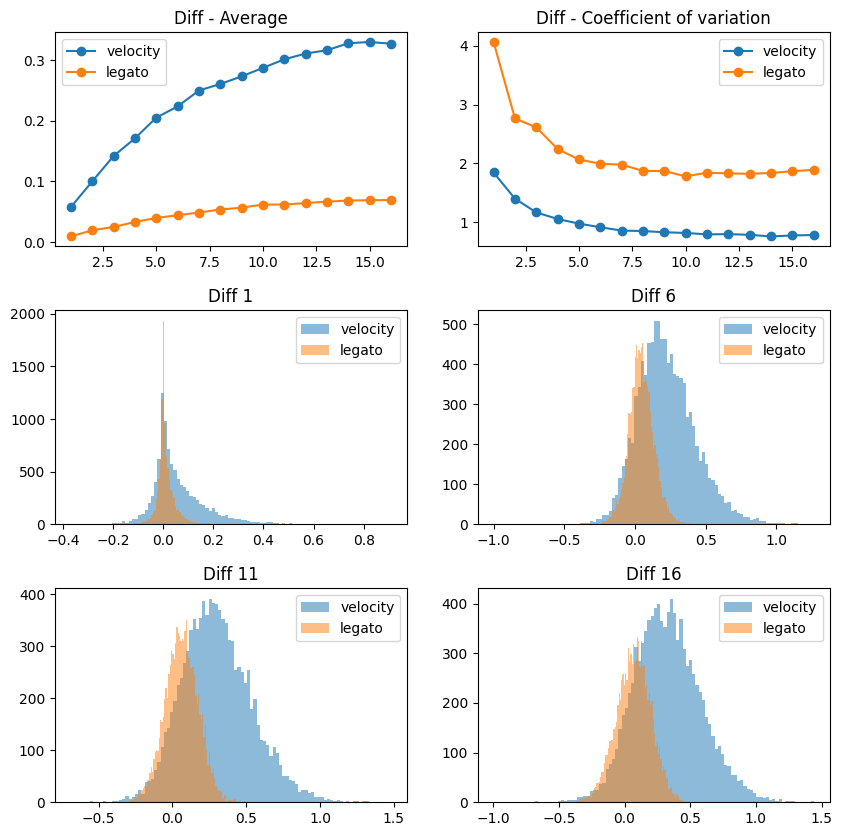

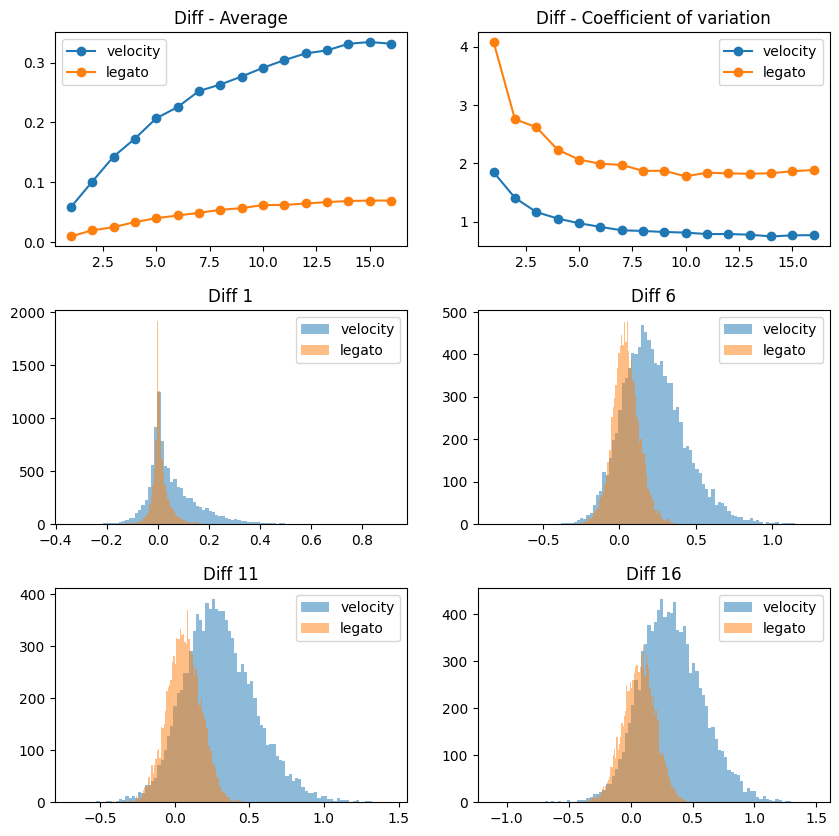

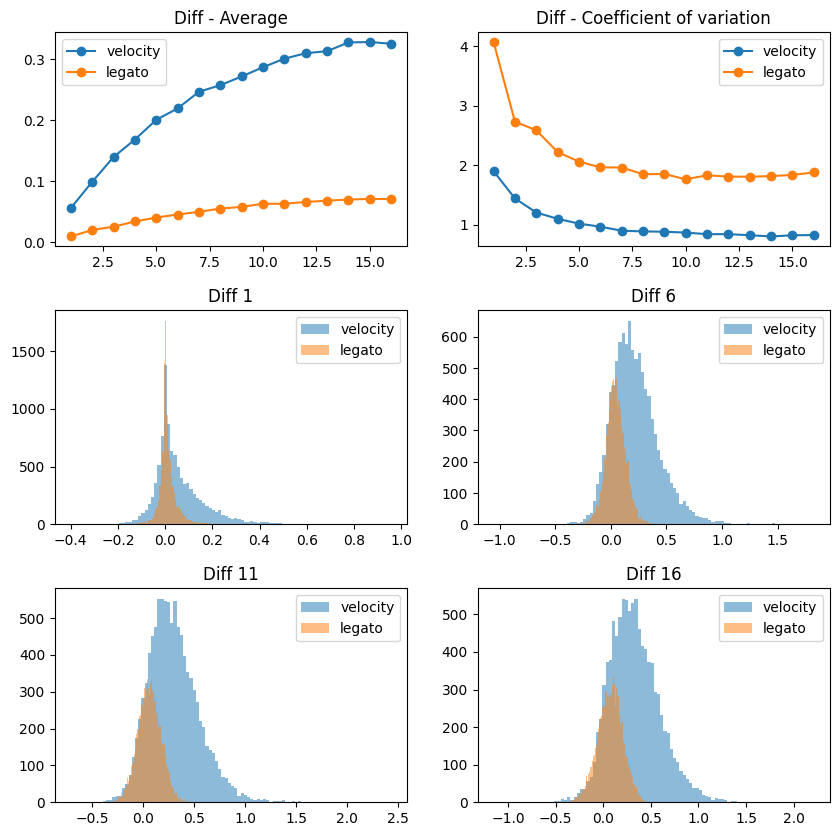

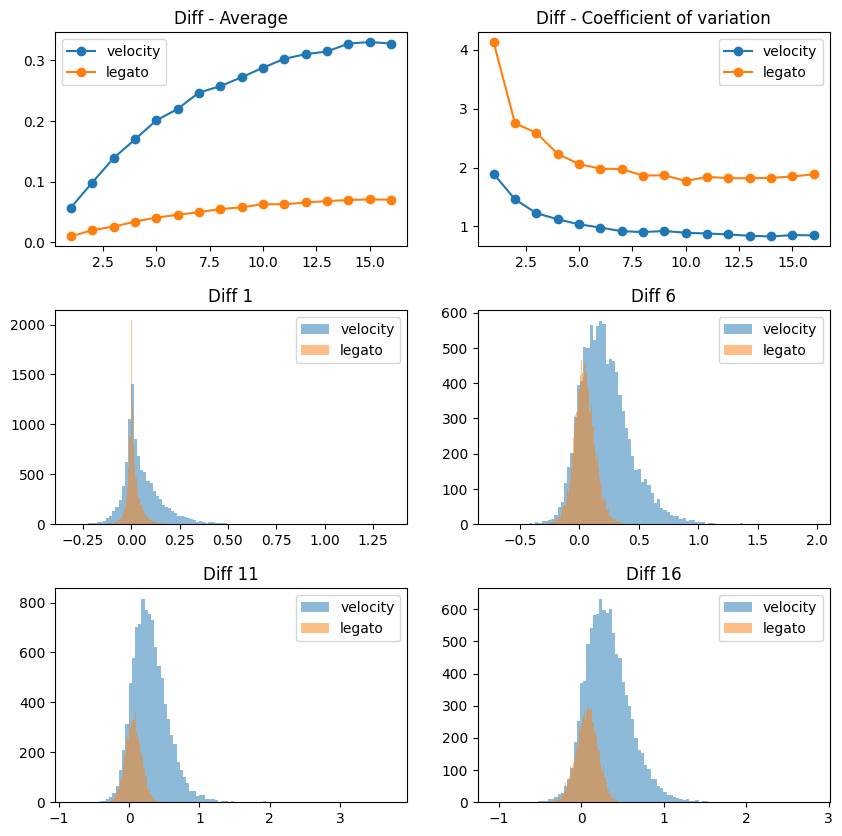

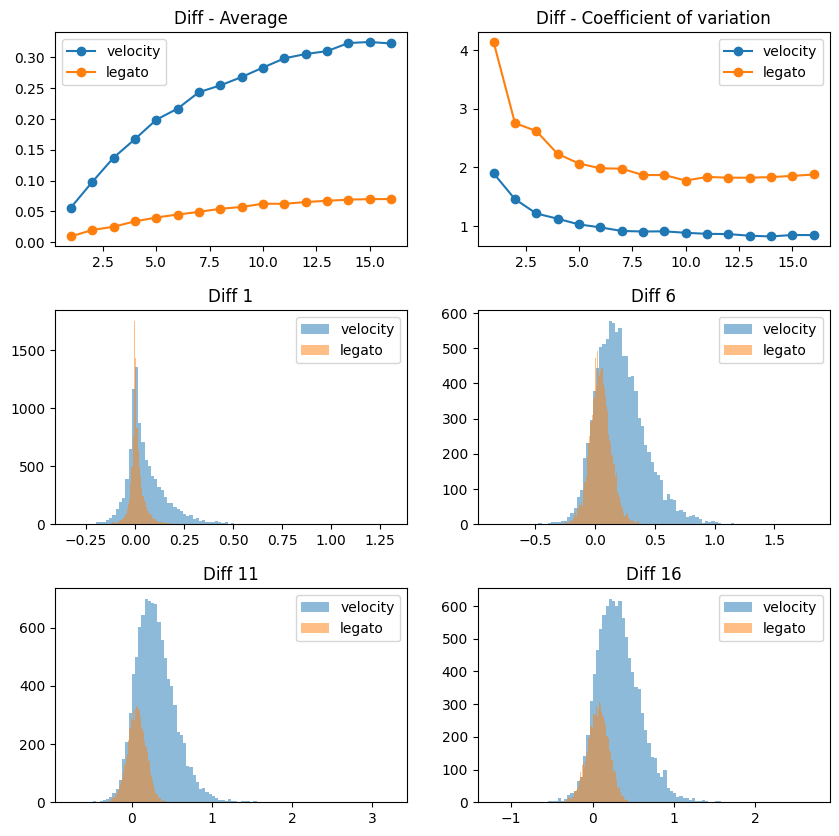

In [7]:
for a in range(1):
    for w in range(1, 2):
        for ld in range(1, 2):
            for av in range(len(absolute_velocities)):
                test(absolute_velocities[av], latent_dim[ld], weights[w], architecture[a], f'{a}{w}{ld}{av}')